In [1]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import OneClassSVM
from robocop import fetch_events,build_pid_windows,evaluate_and_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
NUM_SYSCALLS = 473
NGRAM = 4
NU = 0.05
GAMMA = "scale"

In [3]:
encoder = OneHotEncoder(
    categories=[np.arange(NUM_SYSCALLS)] * NGRAM,
)

encoder.fit(np.zeros((1, NGRAM), dtype=np.int32))


OneHotEncoder(categories=[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106...
       377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389,
       390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402,
       403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415,
       416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428,
       429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441,
       442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454,
       455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467,
       468, 469, 470, 471, 472])])

In [4]:

def extract_features(window, syscall_to_id=None):
    syscalls = [e["syscall_num"] for e in window]
    if len(syscalls) < NGRAM:
        return np.zeros(NUM_SYSCALLS * NGRAM, dtype=np.float32)
    trigrams = np.array(
        [syscalls[i:i+NGRAM] for i in range(len(syscalls) - NGRAM + 1)],
        dtype=np.int32
    )
    onehot = encoder.transform(trigrams)
    return np.asarray(onehot.sum(axis=0)).ravel().astype(np.float32)

def build_X(windows, syscall_to_id=None):
    return np.array([extract_features(w) for w in windows], dtype=np.float32)

In [5]:
def show_pca_as_graph_3d(X):
    pca = PCA(n_components=3)
    X_3d = pca.fit_transform(X)

    ax = plt.figure().add_subplot(111,projection='3d')
    ax.scatter(X_3d[:, 0], X_3d[:, 1],X_3d[:,2])
    plt.xlabel("Projection_X")
    plt.ylabel("Projection_Y")
    plt.title("X_train projected to 3D using PCA")
    plt.show()

In [6]:
def show_pca_as_graph(X):
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)

    plt.figure()
    plt.scatter(X_2d[:, 0], X_2d[:, 1])
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("X_train projected to 2D using PCA")
    plt.show()

In [15]:
virus_events = fetch_events("test = '10'",100_000)
virus_windows = build_pid_windows(virus_events)
X_virus = build_X(virus_windows)

In [16]:
X_virus.shape

(24970, 1892)

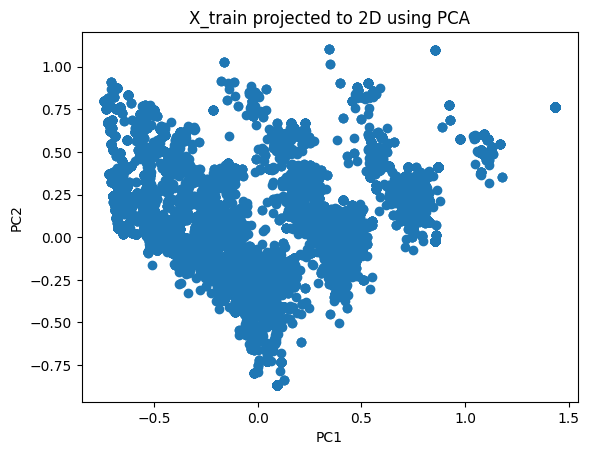

In [17]:
show_pca_as_graph(X_virus)

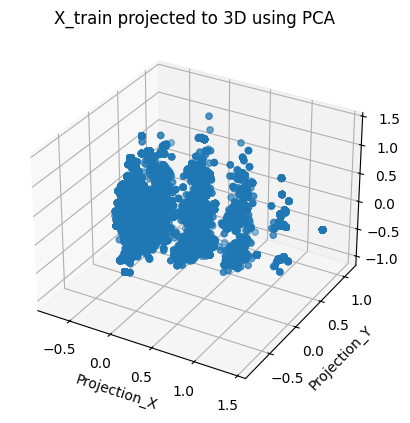

In [42]:
show_pca_as_graph_3d(X_virus)

In [18]:
virus_events2 = fetch_events("test = '12'",100_000)
virus_windows2 = build_pid_windows(virus_events)
X_virus2 = build_X(virus_windows)

In [45]:
X_virus2.shape

(2487, 1892)

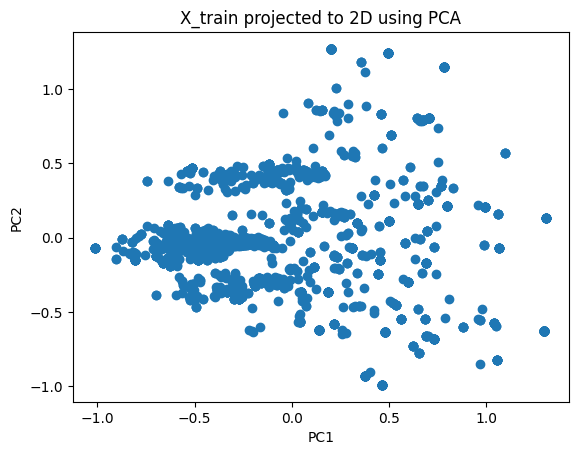

In [44]:
show_pca_as_graph(X_virus2)

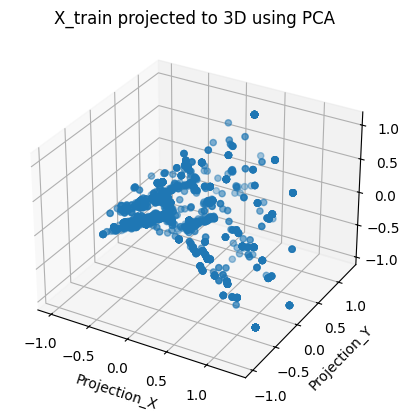

In [43]:
show_pca_as_graph_3d(X_virus2)